<a href="https://colab.research.google.com/github/garvitupdy/ml_project/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('stroke_risk_dataset.csv')

In [ ]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
df = df.rename(columns={'Chest Pain': 'chest_pain', 'Shortness of Breath': 'shortness_of_breadth', "Irregular Heartbeat":
                        "irregular_heartbeat", 'Fatigue & Weakness': 'fatigue', 'Dizziness': 'dizziness'})


In [ ]:
df = df.rename(columns= {'Swelling (Edema)' : "swelling", 'Pain in Neck/Jaw/Shoulder/Back': "cervical_pain", 'Excessive Sweating'
: 'excessive_sweating', 'Persistent Cough' : 'persistent_cough', 'Nausea/Vomiting': "vomiting", 'High Blood Pressure': 'high_bp'})

In [ ]:
df = df.rename(columns = {'Chest Discomfort (Activity)': 'chest_discomfort', 'Cold Hands/Feet': 'cold_limbs',
               'Snoring/Sleep Apnea': 'snoring', 'Anxiety/Feeling of Doom': 'anxiety', 'Age': 'age', 'Stroke Risk (%)': 'stroke_risk',
              'At Risk (Binary)': 'at_risk' })

In [ ]:
df.head()

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
df.shape

(70000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   chest_pain            70000 non-null  int64  
 1   shortness_of_breadth  70000 non-null  int64  
 2   irregular_heartbeat   70000 non-null  int64  
 3   fatigue               70000 non-null  int64  
 4   dizziness             70000 non-null  int64  
 5   swelling              70000 non-null  int64  
 6   cervical_pain         70000 non-null  int64  
 7   excessive_sweating    70000 non-null  int64  
 8   persistent_cough      70000 non-null  int64  
 9   vomiting              70000 non-null  int64  
 10  high_bp               70000 non-null  int64  
 11  chest_discomfort      70000 non-null  int64  
 12  cold_limbs            70000 non-null  int64  
 13  snoring               70000 non-null  int64  
 14  anxiety               70000 non-null  int64  
 15  age                

In [ ]:
df.describe()

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


In [ ]:
df.isnull().sum()

,0
chest_pain,0
shortness_of_breadth,0
irregular_heartbeat,0
fatigue,0
dizziness,0
swelling,0
cervical_pain,0
excessive_sweating,0
persistent_cough,0
vomiting,0


In [ ]:
df[df["stroke_risk"] == 100.000000]

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk
2498,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,88,100.0,1
8772,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,78,100.0,1
9703,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,90,100.0,1
28470,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,81,100.0,1
30459,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,79,100.0,1
31410,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,89,100.0,1
39801,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,88,100.0,1
48279,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,90,100.0,1
48425,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,89,100.0,1
53136,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,90,100.0,1


In [ ]:
df[df["stroke_risk"] == 5]


,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk
55759,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,5.0,0


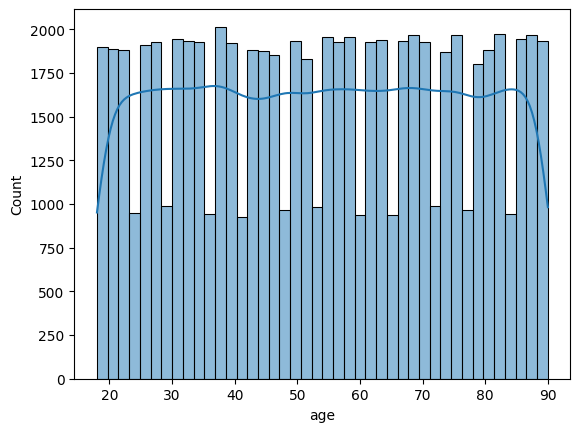

In [ ]:
sns.histplot(x = "age", data=df,kde = True)
plt.show()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df["age"].value_counts()

,count
age,
37,1039
83,1028
68,1022
88,1018
54,1018
31,997
35,994
89,993
39,992


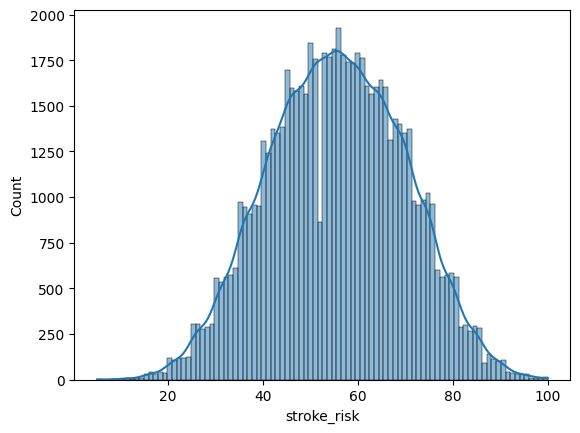

In [ ]:
sns.histplot(x='stroke_risk', data=df,kde = True)
plt.show()

In [ ]:
df["stroke_risk"].value_counts()

,count
stroke_risk,
56.0,991
55.5,938
50.5,932
56.5,928
55.0,918
50.0,910
58.5,909
59.5,909
52.5,906


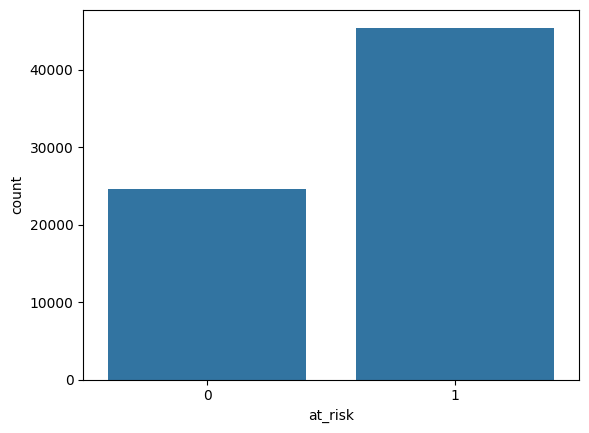

In [ ]:
sns.countplot(x='at_risk', data=df)
plt.show()

In [ ]:
df["at_risk"].value_counts()

,count
at_risk,
1,45444
0,24556


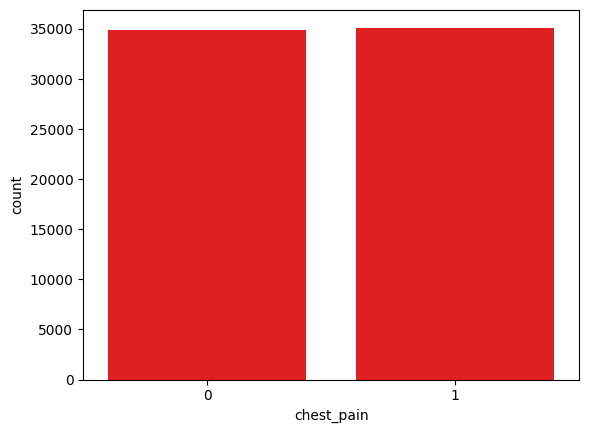

In [ ]:
sns.countplot(x='chest_pain', data=df, color= 'red')
plt.show()

In [ ]:
df["chest_pain"].value_counts()

,count
chest_pain,
1,35131
0,34869


In [ ]:
df.columns

Index(['chest_pain', 'shortness_of_breadth', 'irregular_heartbeat', 'fatigue',
       'dizziness', 'swelling', 'cervical_pain', 'excessive_sweating',
       'persistent_cough', 'vomiting', 'high_bp', 'chest_discomfort',
       'cold_limbs', 'snoring', 'anxiety', 'age', 'stroke_risk', 'at_risk'],
      dtype='object')

In [ ]:
cols = ['shortness_of_breadth','irregular_heartbeat', 'fatigue',
       'dizziness', 'swelling', 'cervical_pain', 'excessive_sweating',
       'persistent_cough', 'vomiting', 'high_bp', 'chest_discomfort',
       'cold_limbs', 'snoring', 'anxiety']

for col in cols:
  print(df[col].value_counts())


shortness_of_breadth
0    35247
1    34753
Name: count, dtype: int64
irregular_heartbeat
0    35078
1    34922
Name: count, dtype: int64
fatigue
1    35007
0    34993
Name: count, dtype: int64
dizziness
1    35213
0    34787
Name: count, dtype: int64
swelling
1    35039
0    34961
Name: count, dtype: int64
cervical_pain
0    35057
1    34943
Name: count, dtype: int64
excessive_sweating
1    35257
0    34743
Name: count, dtype: int64
persistent_cough
1    35056
0    34944
Name: count, dtype: int64
vomiting
1    35136
0    34864
Name: count, dtype: int64
high_bp
1    35045
0    34955
Name: count, dtype: int64
chest_discomfort
0    35031
1    34969
Name: count, dtype: int64
cold_limbs
0    35079
1    34921
Name: count, dtype: int64
snoring
1    35048
0    34952
Name: count, dtype: int64
anxiety
0    35009
1    34991
Name: count, dtype: int64


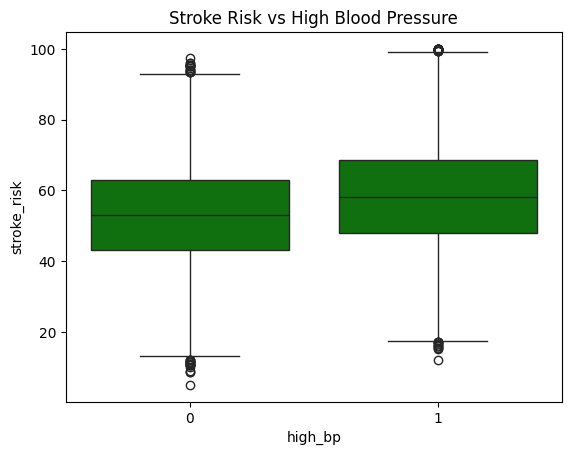

In [ ]:
sns.boxplot(x='high_bp', y='stroke_risk', data=df, color= 'green')
plt.title('Stroke Risk vs High Blood Pressure')
plt.show()

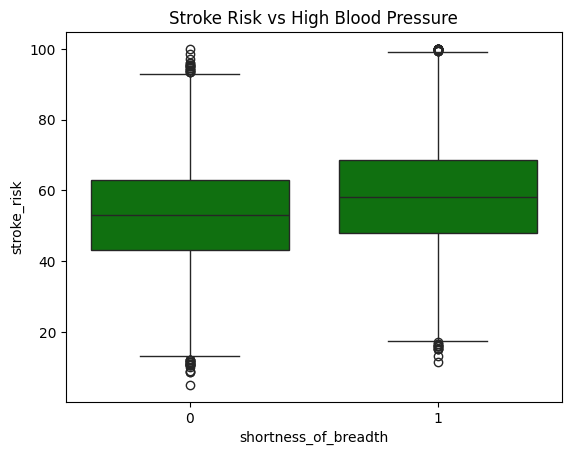

In [ ]:
sns.boxplot(x='shortness_of_breadth', y='stroke_risk', data=df, color= 'green')
plt.title('Stroke Risk vs High Blood Pressure')
plt.show()

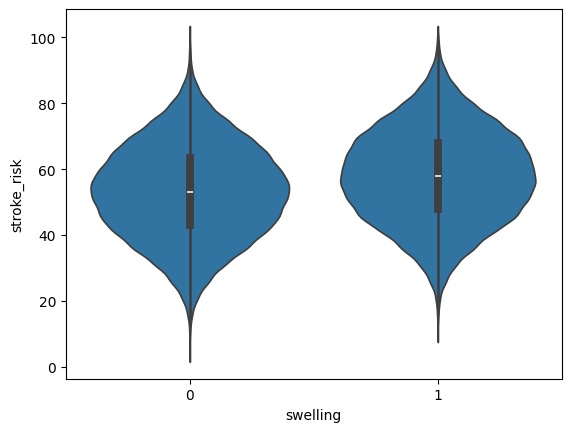

In [ ]:
sns.violinplot(x='swelling', y='stroke_risk', data=df)
plt.show()


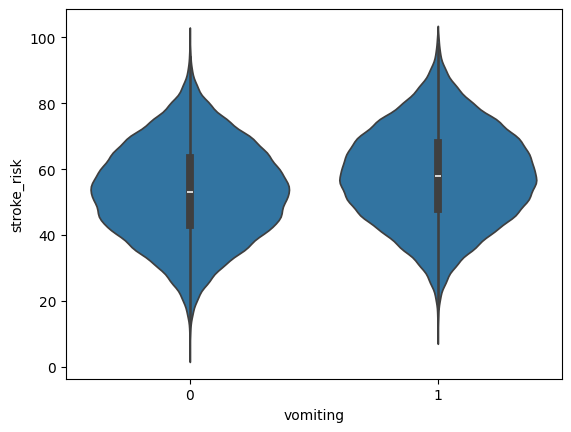

In [ ]:
sns.violinplot(x='vomiting', y='stroke_risk', data=df)
plt.show()

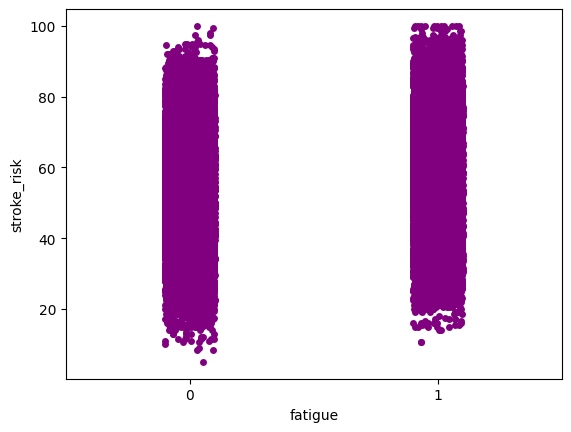

In [ ]:
sns.stripplot(x='fatigue', y='stroke_risk', data=df, color= 'purple')
plt.show()

<Axes: xlabel='cervical_pain', ylabel='stroke_risk'>

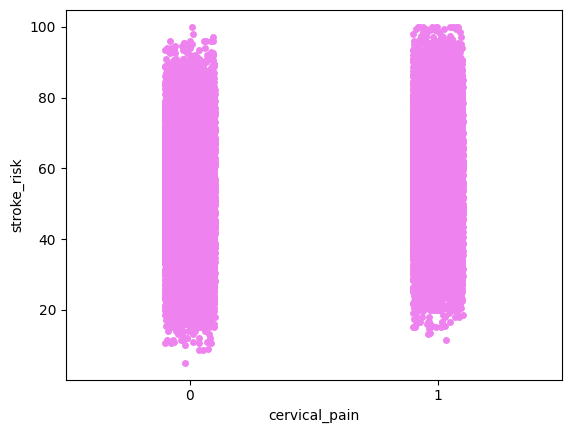

In [ ]:
sns.stripplot(x='cervical_pain', y='stroke_risk', data=df, color = 'violet')

<Axes: xlabel='chest_discomfort', ylabel='stroke_risk'>

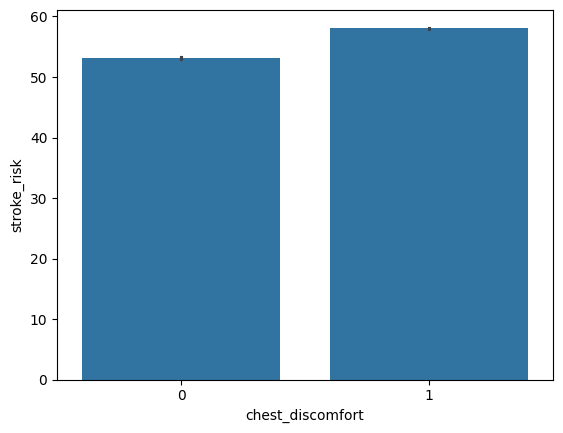

In [ ]:
sns.barplot(x='chest_discomfort', y='stroke_risk', data=df)


<Axes: xlabel='cold_limbs', ylabel='stroke_risk'>

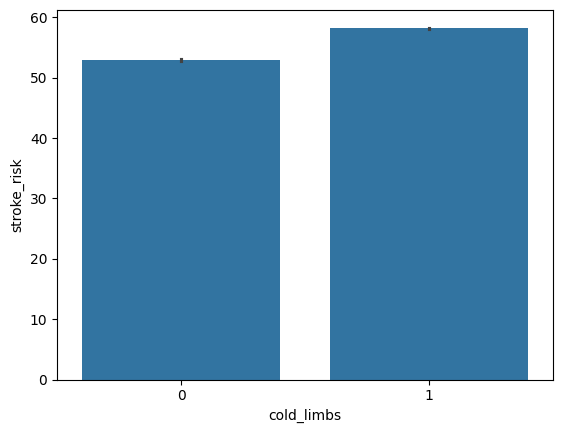

In [ ]:
sns.barplot(x='cold_limbs', y='stroke_risk', data=df)

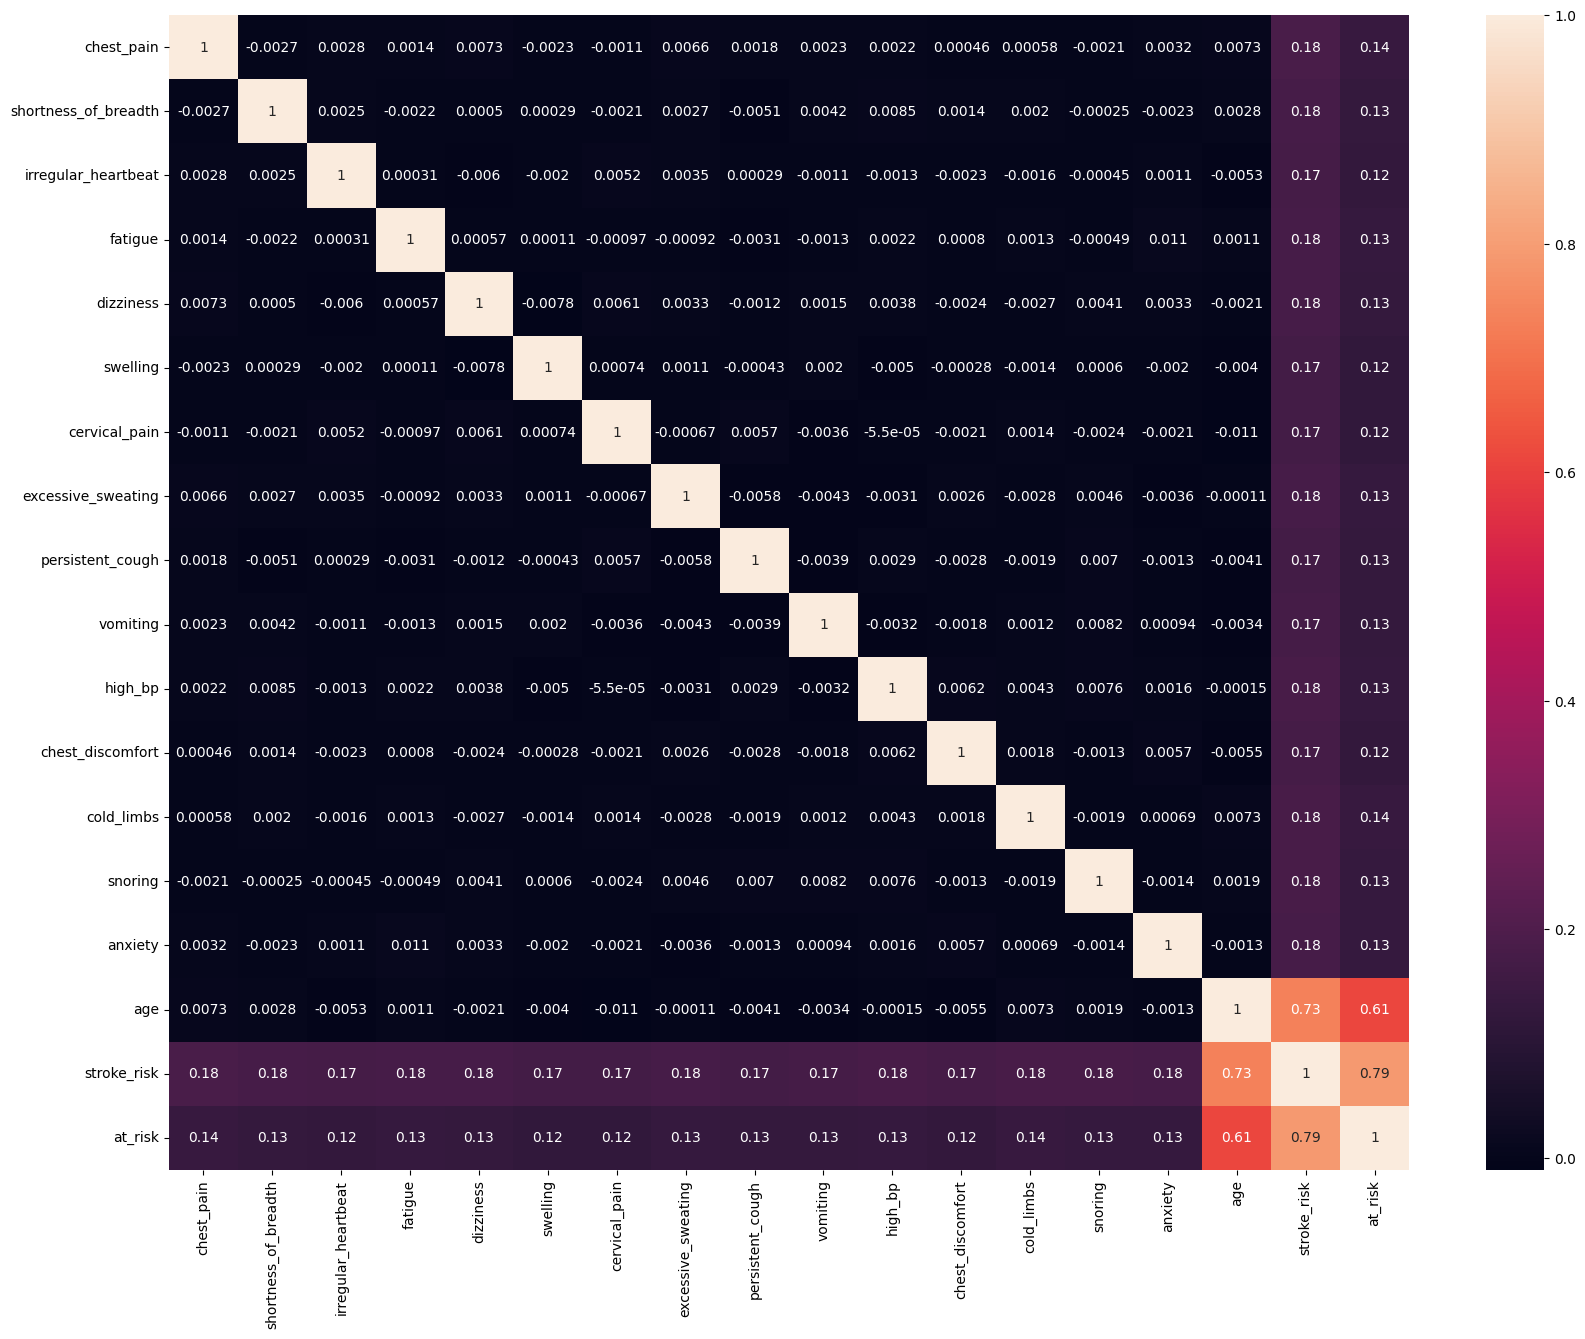

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
df['stroke_risk'] = df['stroke_risk'].astype(int)

In [ ]:
from scipy.stats import pearsonr

selected_features = ['chest_pain', 'shortness_of_breadth', 'irregular_heartbeat', 'fatigue',
       'dizziness', 'swelling', 'cervical_pain', 'excessive_sweating',
       'persistent_cough', 'vomiting', 'high_bp', 'chest_discomfort',
       'cold_limbs', 'snoring', 'anxiety', 'age', 'stroke_risk', 'at_risk']

correlations = {
    feature: pearsonr(df[feature], df['at_risk'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
17,at_risk,1.000000
16,stroke_risk,0.790874
15,age,0.612038
12,cold_limbs,0.136642
0,chest_pain,0.135365
13,snoring,0.133681
3,fatigue,0.133060
7,excessive_sweating,0.132806
10,high_bp,0.132301
14,anxiety,0.131466


In [ ]:
cat_features = ['chest_pain', 'shortness_of_breadth', 'irregular_heartbeat', 'fatigue',
       'dizziness', 'swelling', 'cervical_pain', 'excessive_sweating',
       'persistent_cough', 'vomiting', 'high_bp', 'chest_discomfort',
       'cold_limbs', 'snoring', 'anxiety']

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd


alpha = 0.05

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df[col], df['at_risk'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
cold_limbs,1306.40007,0.0,Reject Null (Keep Feature)
chest_pain,1282.099097,0.0,Reject Null (Keep Feature)
snoring,1250.387813,0.0,Reject Null (Keep Feature)
fatigue,1238.781257,0.0,Reject Null (Keep Feature)
excessive_sweating,1234.057726,0.0,Reject Null (Keep Feature)
high_bp,1224.696437,0.0,Reject Null (Keep Feature)
anxiety,1209.284741,0.0,Reject Null (Keep Feature)
shortness_of_breadth,1191.245047,0.0,Reject Null (Keep Feature)
dizziness,1190.538879,0.0,Reject Null (Keep Feature)
persistent_cough,1158.927643,0.0,Reject Null (Keep Feature)


In [ ]:
df.columns

Index(['chest_pain', 'shortness_of_breadth', 'irregular_heartbeat', 'fatigue',
       'dizziness', 'swelling', 'cervical_pain', 'excessive_sweating',
       'persistent_cough', 'vomiting', 'high_bp', 'chest_discomfort',
       'cold_limbs', 'snoring', 'anxiety', 'age', 'stroke_risk', 'at_risk'],
      dtype='object')

In [ ]:
df['cardio_systems'] = df['chest_pain'] + df['irregular_heartbeat'] + df['chest_discomfort'] + df['high_bp']
display(df.head())

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk,cardio_systems
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58,1,2
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40,0,2
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52,1,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60,1,3
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56,1,2


In [ ]:
df['neuro_systems'] = df['dizziness'] + df['swelling'] + df['cervical_pain'] + df['cold_limbs'] + df['vomiting']
display(df.head())

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,high_bp,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk,cardio_systems,neuro_systems
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58,1,2,2
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40,0,2,2
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52,1,1,2
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60,1,3,3
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56,1,2,2


In [ ]:
df['respiratiory'] = df['shortness_of_breadth'] + df['persistent_cough'] + df['snoring']
display(df.head())

,chest_pain,shortness_of_breadth,irregular_heartbeat,fatigue,dizziness,swelling,cervical_pain,excessive_sweating,persistent_cough,vomiting,...,chest_discomfort,cold_limbs,snoring,anxiety,age,stroke_risk,at_risk,cardio_systems,neuro_systems,respiratiory
0,0,1,1,1,0,0,0,1,1,1,...,1,1,0,0,54,58,1,2,2,2
1,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,49,40,0,2,2,1
2,1,0,0,1,1,1,0,0,1,0,...,0,0,1,0,62,52,1,1,2,2
3,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,48,60,1,3,3,1
4,0,0,1,0,0,1,0,1,0,1,...,0,0,1,1,61,56,1,2,2,1


In [ ]:
X = df.drop(['at_risk', 'stroke_risk'], axis=1)
y = df['at_risk']

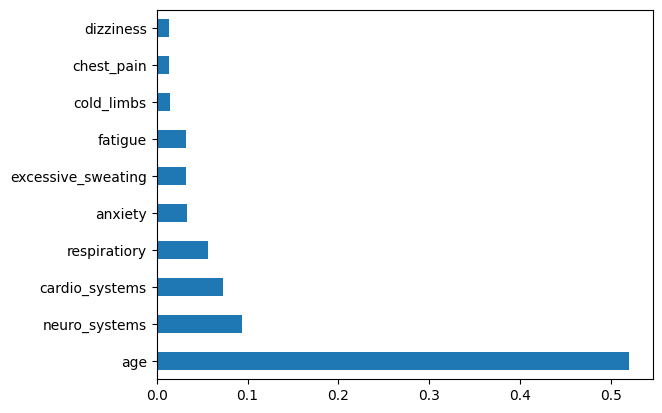

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y.astype(int))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
final_df = df[['age', 'anxiety', 'excessive_sweating', 'swelling', 'fatigue','cardio_systems', 'neuro_systems', 'respiratiory', 'at_risk' ]]

In [ ]:
x = final_df.drop(['at_risk'], axis=1)
Y = final_df['at_risk']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=42)

In [ ]:

noise = np.random.normal(0, 0.01, X_train.shape)
X_train_noisy = X_train + noise

In [ ]:
test_noise = np.random.normal(0, 0.1, X_test.shape)
X_test_noisy = X_test + test_noise

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C= 1, class_weight= "balanced", max_iter= 100, penalty= 'l1', solver= 'saga')

model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
y_pred = model.predict(X_test_noisy)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9685714285714285
[[ 8010   111]
 [  615 14364]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8121
           1       0.99      0.96      0.98     14979

    accuracy                           0.97     23100
   macro avg       0.96      0.97      0.97     23100
weighted avg       0.97      0.97      0.97     23100



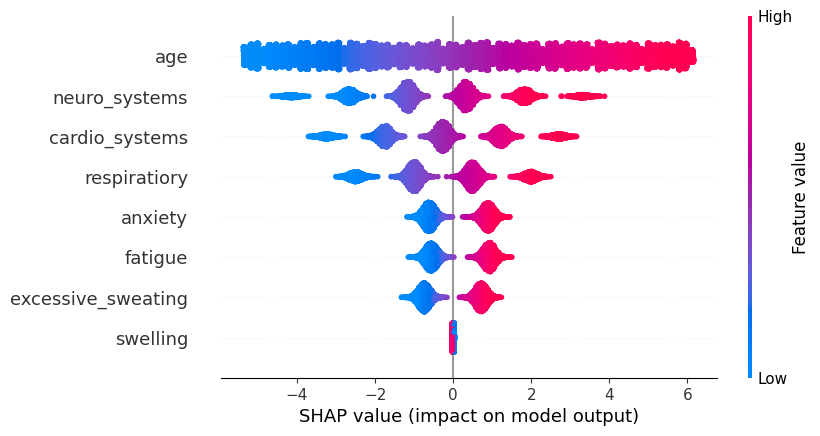

In [ ]:
import shap
explainer = shap.Explainer(model, X_train_noisy)
shap_values = explainer(X_test_noisy)


shap.plots.beeswarm(shap_values)


In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
y_pred_svm = model.predict(X_test_noisy)

In [ ]:
print(accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

0.9685714285714285
[[ 8010   111]
 [  615 14364]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8121
           1       0.99      0.96      0.98     14979

    accuracy                           0.97     23100
   macro avg       0.96      0.97      0.97     23100
weighted avg       0.97      0.97      0.97     23100



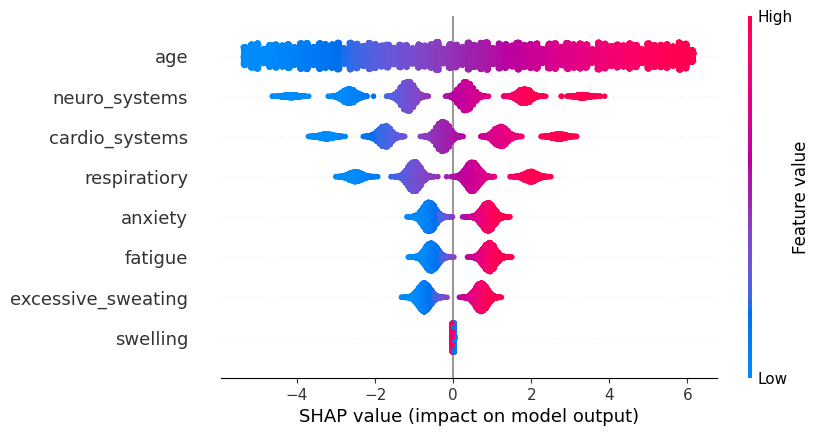

In [ ]:
explainer_svm = shap.Explainer(model, X_train_noisy)
shap_values_svm = explainer(X_test_noisy)


shap.plots.beeswarm(shap_values_svm)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = model_dt.predict(X_test_noisy)

In [ ]:
print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

0.9902164502164502
[[ 8002   119]
 [  107 14872]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8121
           1       0.99      0.99      0.99     14979

    accuracy                           0.99     23100
   macro avg       0.99      0.99      0.99     23100
weighted avg       0.99      0.99      0.99     23100



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(X_test_noisy)


In [ ]:
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.9928138528138528
[[ 8023    98]
 [   68 14911]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8121
           1       0.99      1.00      0.99     14979

    accuracy                           0.99     23100
   macro avg       0.99      0.99      0.99     23100
weighted avg       0.99      0.99      0.99     23100



In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Dense


from tensorflow.keras.layers import Dropout


from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.layers import LeakyReLU, PReLU

deep_model = Sequential([
    Dense(16, input_dim=X_train.shape[1]),
    LeakyReLU(alpha=0.01),
    Dense(8),
    PReLU(),
    Dense(4),
    LeakyReLU(),
    Dense(1, activation='sigmoid')
])

In [ ]:
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
deep_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7416 - loss: 0.4805 - precision: 0.7326 - recall: 0.9552
Epoch 2/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9607 - loss: 0.1579 - precision: 0.9571 - recall: 0.9835
Epoch 3/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9726 - loss: 0.0896 - precision: 0.9737 - recall: 0.9847
Epoch 4/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9789 - loss: 0.0651 - precision: 0.9820 - recall: 0.9854
Epoch 5/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9817 - loss: 0.0547 - precision: 0.9846 - recall: 0.9873
Epoch 6/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0501 - precision: 0.9853 - recall: 0.9867
Epoch 7/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9846 - loss: 0.0434 - precision: 0.9873 - recall: 0.9890
Epoch 8/50
1466/1466 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0473 - precision: 0.9846 - recall: 0.9860


In [ ]:

y_pred_deep = deep_model.predict(X_test_noisy)
y_pred_deep = (y_pred_deep > 0.5).astype(int)


print("Deep Learning Model Accuracy:", accuracy_score(y_test, y_pred_deep))
print("Deep Learning Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("Deep Learning Model Classification Report:\n", classification_report(y_test, y_pred_deep))

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Deep Learning Model Accuracy: 0.9752380952380952
Deep Learning Model Confusion Matrix:
 [[ 8010   111]
 [  615 14364]]
Deep Learning Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      8121
           1       0.97      0.99      0.98     14979

    accuracy                           0.98     23100
   macro avg       0.98      0.97      0.97     23100
weighted avg       0.98      0.98      0.98     23100



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gb = model_gb.predict(X_test_noisy)
print(accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

0.9854978354978355
[[ 7839   282]
 [   53 14926]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8121
           1       0.98      1.00      0.99     14979

    accuracy                           0.99     23100
   macro avg       0.99      0.98      0.98     23100
weighted avg       0.99      0.99      0.99     23100



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred_ada = model_ada.predict(X_test_noisy)
print(accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

0.9886580086580087
[[ 7942   179]
 [   83 14896]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8121
           1       0.99      0.99      0.99     14979

    accuracy                           0.99     23100
   macro avg       0.99      0.99      0.99     23100
weighted avg       0.99      0.99      0.99     23100



In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test_noisy)
print(accuracy_score(y_test, y_pred_xgb))

0.7219480519480519


In [ ]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier()),
    ('svm', SVC()),
    ('dt', DecisionTreeClassifier())
]

meta_model = GradientBoostingClassifier()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test_noisy)

print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
print("Stacking Model Classification Report:\n", classification_report(y_test, y_pred_stacking))

Stacking Model Accuracy: 0.9943290043290043
Stacking Model Confusion Matrix:
 [[ 8044    77]
 [   54 14925]]
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8121
           1       0.99      1.00      1.00     14979

    accuracy                           0.99     23100
   macro avg       0.99      0.99      0.99     23100
weighted avg       0.99      0.99      0.99     23100



In [ ]:
import joblib
joblib.dump(stacking_model,'model.pkl')

joblib.dump(X_train.columns.tolist(),'columns.pkl')

['columns.pkl']